In [102]:
import joblib
import numpy as np
import pandas as pd 
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [103]:
filename = './datasets/Training.csv'
data = read_csv(filename)
data.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [104]:
# Feature selection
X = data.drop(columns=['prognosis'])
y = data['prognosis']

In [105]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
X_train.shape

(244, 134)

In [107]:
X_test.shape

(62, 134)

### Gaussian Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 1.0


In [109]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred_gnb)

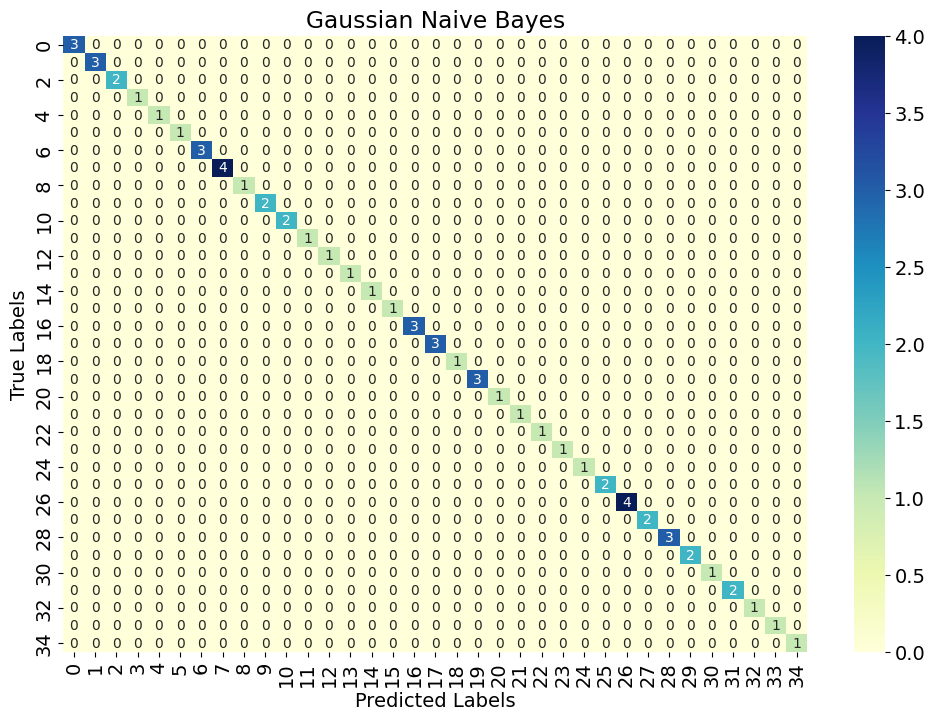

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Gaussian Naive Bayes')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [111]:
X_test.head(10)

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
210,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
159,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
y_test.head(10)

274                        Psoriasis
66                       Common Cold
258             Peptic ulcer disease
210                         Jaundice
159                      Hepatitis E
22                           Allergy
224                         Migraine
92      Dimorphic hemorrhoids(piles)
269                        Psoriasis
247    Paroxysmal Positional Vertigo
Name: prognosis, dtype: object

In [113]:
# Making Prediction
prediction = gnb.predict(X_test)
print(prediction[0:10])

['Psoriasis' 'Common Cold' 'Peptic ulcer disease' 'Jaundice' 'Hepatitis E'
 'Allergy' 'Migraine' 'Dimorphic hemorrhoids(piles)' 'Psoriasis'
 'Paroxysmal Positional Vertigo']


In [114]:
# Dumping the model
joblib.dump(gnb, 'model/naive_bayes.pkl')
# Loading the model
nb = joblib.load('model/naive_bayes.pkl')

In [115]:
# Feature selection
list_a = ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feet', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dyschromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'fluid_overload.1', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irritability', 'irritation_in_anus', 'itching', 'joint_pain', 'knee_pain', 'lack_of_concentration', 'lethargy', 'loss_of_appetite', 'loss_of_balance', 'loss_of_smell', 'loss_of_taste', 'malaise', 'mild_fever', 'mood_swings', 'movement_stiffness', 'mucoid_sputum', 'muscle_pain', 'muscle_wasting', 'muscle_weakness', 'nausea', 'neck_pain', 'nodal_skin_eruptions', 'obesity', 'pain_behind_the_eyes', 'pain_during_bowel_movements', 'pain_in_anal_region', 'painful_walking', 'palpitations', 'passage_of_gases', 'patches_in_throat', 'phlegm', 'polyuria', 'prominent_veins_on_calf', 'puffy_face_and_eyes', 'pus_filled_pimples', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'red_sore_around_nose', 'red_spots_over_body', 'redness_of_eyes', 'restlessness', 'runny_nose', 'rusty_sputum', 'scurrying', 'shivering', 'silver_like_dusting', 'sinus_pressure', 'skin_peeling', 'skin_rash', 'slurred_speech', 'small_dents_in_nails', 'spinning_movements', 'spotting_urination', 'stiff_neck', 'stomach_bleeding', 'stomach_pain', 'sunken_eyes', 'sweating', 'swelled_lymph_nodes', 'swelling_joints', 'swelling_of_stomach', 'swollen_blood_vessels', 'swollen_extremities', 'swollen_legs', 'throat_irritation', 'tiredness', 'toxic_look_(typhus)', 'ulcers_on_tongue', 'unsteadiness', 'visual_disturbances', 'vomiting', 'watering_from_eyes', 'weakness_in_limbs', 'weakness_of_one_body_side', 'weight_gain', 'weight_loss', 'yellow_crust_ooze', 'yellow_urine', 'yellowing_of_eyes', 'yellowish_skin']

In [116]:
# Loop to convert all symptoms into 0's
list_c = [] # Empty list to store diasese sympotms in 0's and 1's
for x in range(0,len(list_a)):
    list_c.append(0)

In [117]:
list_b = ['fever', 'chills', 'headache', 'nausea', 'vomiting', 'diarrhea','muscle pain', 'tiredness', 'sweating']

In [118]:
# For all matched specific disease sympotms in general put 1 and unmatched put 0 
for z in range(0,len(list_a)):
	for k in list_b:
		if(k==list_a[z]):
			list_c[z]=1

In [119]:
test2=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [120]:
test2 = np.array(test2)
print(test2.shape)
test2 = np.array(test2).reshape(1,-1)
print(test2.shape)

(134,)
(1, 134)


In [121]:
test = list_c
test = np.array(test)
print(test.shape)
test = np.array(test).reshape(1,-1)
print(test.shape)

(134,)
(1, 134)


In [122]:
prediction = nb.predict(test2)
print(prediction[0])

Malaria


/home/dgclasher/Development/projects/others/disease-predict-ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names


### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [124]:
from sklearn.metrics import accuracy_score
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9516129032258065


In [125]:
# Dumping the model
joblib.dump(rf, 'model/random_forest.pkl')
# Loading the model
rf = joblib.load('model/random_forest.pkl')

In [126]:
test = list_c
test = np.array(test)
print(test.shape)
test = np.array(test).reshape(1,-1)
print(test.shape)

(134,)
(1, 134)


In [127]:
prediction = rf.predict(test)
print(prediction[0])

Malaria


/home/dgclasher/Development/projects/others/disease-predict-ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [128]:
# Making Prediction
prediction = rf.predict(X_test)
print(prediction[0:10])

['Psoriasis' 'Common Cold' 'Peptic ulcer disease' 'Jaundice' 'Hepatitis E'
 'Allergy' 'Migraine' 'Dimorphic hemorrhoids(piles)' 'Psoriasis'
 'Paroxysmal Positional Vertigo']


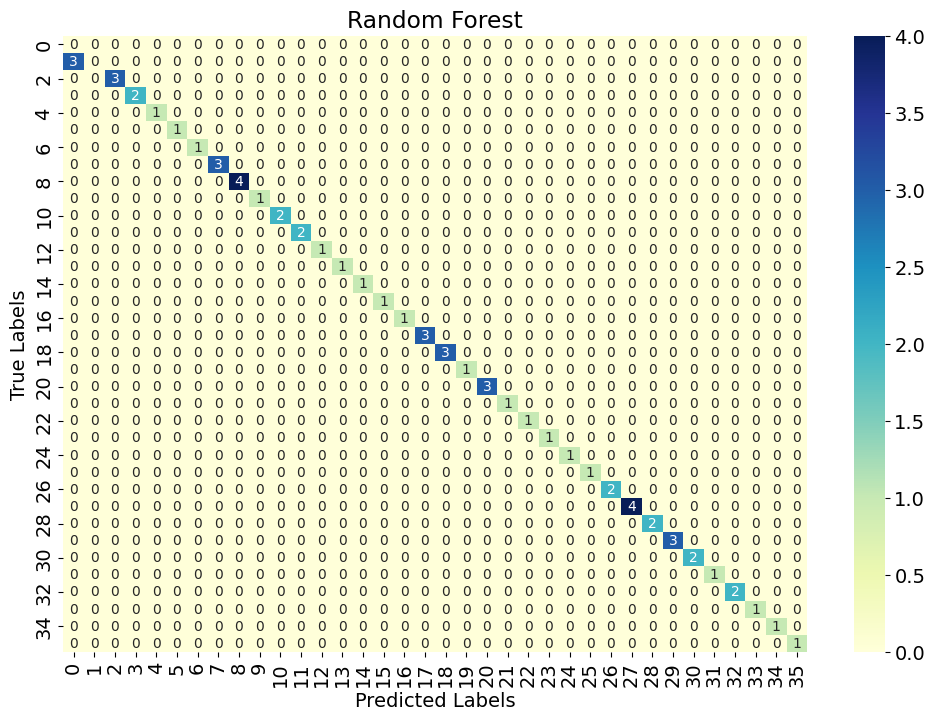

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Random Forest')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [130]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
feature_list = list(X.columns)
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('./tree.dot')
graph.write_png('tree.png')

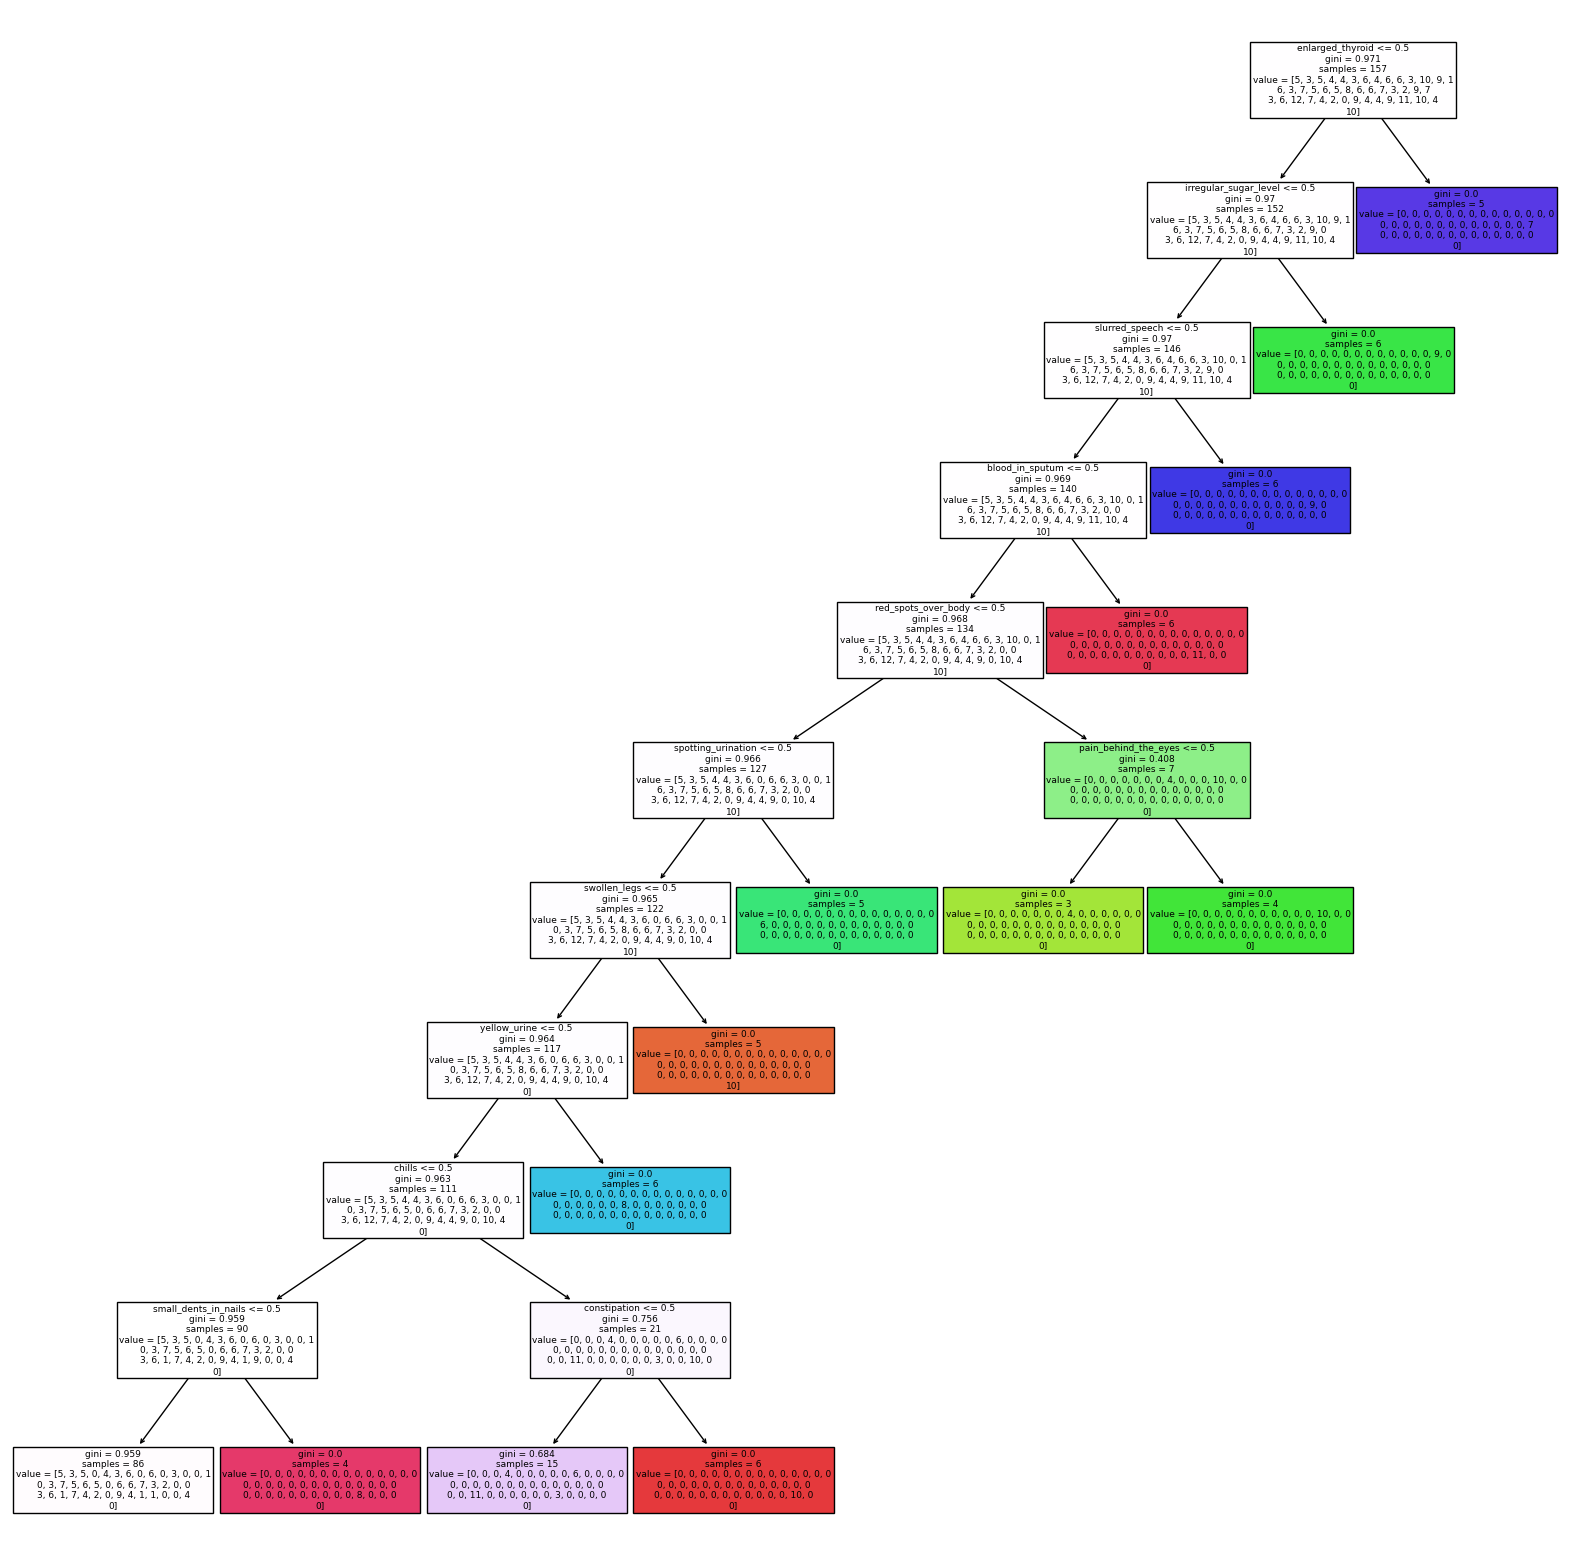

In [131]:

import dtreeviz
from sklearn import tree
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)

### Logistic Regression

In [132]:
# Fitting Model
#from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42)

In [133]:
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9032258064516129


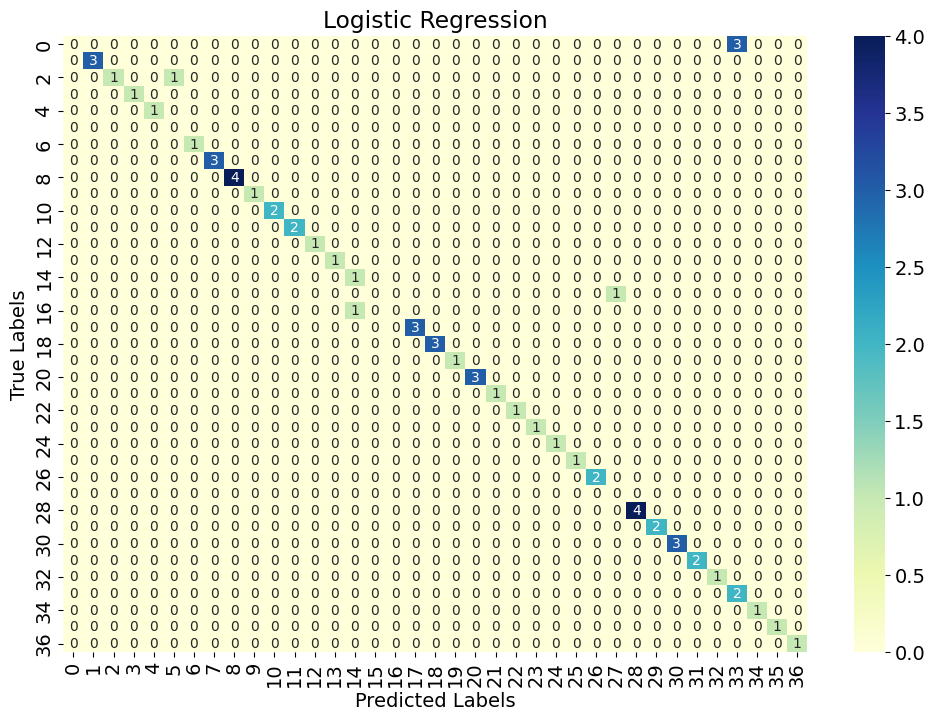

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Logistic Regression')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [135]:
# Dumping the model
joblib.dump(logreg, 'model/logistic_regression.pkl')
# Loading the model
dt = joblib.load('model/logistic_regression.pkl')

In [136]:
prediction = dt.predict(test)
print(prediction[0])

Malaria


/home/dgclasher/Development/projects/others/disease-predict-ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names


### Decision Tree

In [ ]:
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'random_state': [0, 10, 41, 42, 100]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = DecisionTreeClassifier(max_depth=101,random_state=101)
best_dt.fit(X_train, y_train)

dt.fit(X_train, y_train)
best_dt.fit(X_train, y_train)

In [138]:
y_pred_dt = best_dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6612903225806451


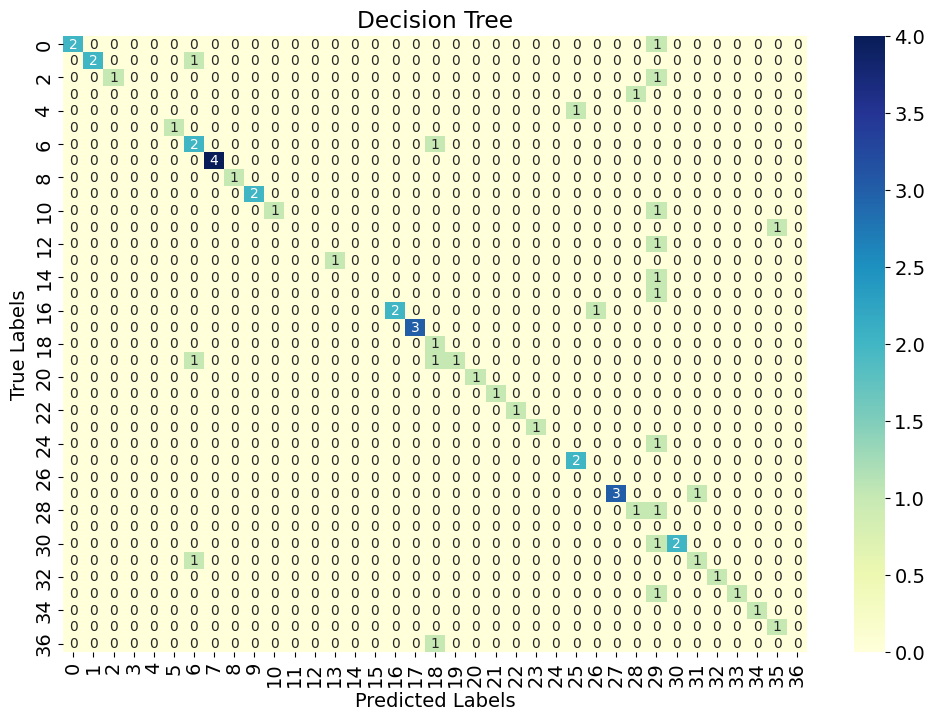

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.axes()
sns.heatmap(cmatrix, annot=True, fmt='d', ax=ax, cmap='YlGnBu', annot_kws={"size": 10})
ax.set_title('Decision Tree')
ax.set_xlabel('Predicted Labels')  
ax.set_ylabel('True Labels')       
plt.show()

In [140]:
# Dumping the model
joblib.dump(best_dt, 'model/decision_tree.pkl')
# Loading the model
best_dt = joblib.load('model/decision_tree.pkl')

In [141]:
prediction = best_dt.predict(test)
print(prediction[0])

Paroxysmal Positional Vertigo


/home/dgclasher/Development/projects/others/disease-predict-ml/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
